Weather meta data - https://www.worldweatheronline.com/weather-api/api/docs/local-city-town-weather-api.aspx

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_all = pd.read_csv(r"/Users/amoghagadde/Desktop/Amogha/Northeastern/SEM_3/ML_Ops/Project/mlops-project/dataset/data/all_merged_zones_weather_demand_data.csv")

/var/folders/sl/p2bldhbn72jg5x6t45zg0_wm0000gn/T/ipykernel_44298/1930319449.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(r"/Users/amoghagadde/Desktop/Amogha/Northeastern/SEM_3/ML_Ops/Project/mlops-project/dataset/data/all_merged_zones_weather_demand_data.csv")


In [3]:
df_all.head(5)

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone
0,2019-06-05T17,82,12,176,0.3,0.0,81,9,5,1008,...,82,23,36,32,90,6,ERCO - Coast,13395,megawatthours,COAS
1,2019-06-05T17,85,6,113,0.0,0.0,25,10,6,1008,...,85,9,14,29,84,7,ERCO - Far West,3442,megawatthours,FWES
2,2019-06-05T17,81,11,356,5.8,0.2,65,10,6,1009,...,81,17,28,30,85,6,ERCO - North Central,14665,megawatthours,NCEN
3,2019-06-05T17,84,6,116,0.0,0.0,62,10,6,1008,...,84,13,20,31,89,7,ERCO - North,1175,megawatthours,NRTH
4,2019-06-05T17,84,4,116,0.0,0.0,68,9,5,1008,...,84,10,16,33,91,7,ERCO - South Central,7760,megawatthours,SCEN


In [4]:
max(df_all['datetime'])

'2023-12-31T00'

In [5]:
min(df_all['datetime'])

'2019-06-05T17'

So data is existing from June 5th,2019 (5:00pm) to Dec 31st,2023 (12:00 am)

In [6]:
df = df_all[df_all['datetime'] < '2019-12-31T23']

In [7]:
df.head()

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone
0,2019-06-05T17,82,12,176,0.3,0.0,81,9,5,1008,...,82,23,36,32,90,6,ERCO - Coast,13395,megawatthours,COAS
1,2019-06-05T17,85,6,113,0.0,0.0,25,10,6,1008,...,85,9,14,29,84,7,ERCO - Far West,3442,megawatthours,FWES
2,2019-06-05T17,81,11,356,5.8,0.2,65,10,6,1009,...,81,17,28,30,85,6,ERCO - North Central,14665,megawatthours,NCEN
3,2019-06-05T17,84,6,116,0.0,0.0,62,10,6,1008,...,84,13,20,31,89,7,ERCO - North,1175,megawatthours,NRTH
4,2019-06-05T17,84,4,116,0.0,0.0,68,9,5,1008,...,84,10,16,33,91,7,ERCO - South Central,7760,megawatthours,SCEN


In [8]:
max(df['datetime'])

'2019-12-31T00'

In [9]:
min(df['datetime'])

'2019-06-05T17'

In [10]:
df.shape

(80000, 27)

Taking up six months data from 2019-06-05 to 2019-12-31

# Data Inspection

In [11]:
df.describe(include='all')

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone
count,80000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,...,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000,80000.000000,80000,80000
unique,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1,22
top,2019-06-05T17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ERCO - Coast,NaN,megawatthours,COAS
freq,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5000,NaN,80000,5000
mean,NaN,64.927375,8.311725,132.404112,0.127963,0.004053,68.313587,9.260275,5.470600,1015.646287,...,63.443050,14.247388,22.931787,18.399538,65.107150,3.135288,NaN,3790.310575,NaN,NaN
std,NaN,18.474344,4.198711,55.289259,0.600532,0.024856,18.730514,1.833787,1.214919,6.947493,...,20.708827,6.471633,10.411931,12.439250,22.386876,2.620958,NaN,4368.854495,NaN,NaN
min,NaN,-1.000000,0.000000,113.000000,0.000000,0.000000,8.000000,0.000000,0.000000,976.000000,...,-19.000000,1.000000,1.000000,-28.000000,-19.000000,1.000000,NaN,280.000000,NaN,NaN
25%,NaN,52.000000,5.000000,113.000000,0.000000,0.000000,55.000000,10.000000,6.000000,1011.000000,...,50.000000,9.000000,15.000000,10.000000,50.000000,1.000000,NaN,1263.000000,NaN,NaN
50%,NaN,67.000000,8.000000,113.000000,0.000000,0.000000,70.000000,10.000000,6.000000,1015.000000,...,67.000000,13.000000,22.000000,20.000000,67.000000,1.000000,NaN,1898.000000,NaN,NaN
75%,NaN,79.000000,11.000000,116.000000,0.000000,0.000000,84.000000,10.000000,6.000000,1020.000000,...,79.000000,18.000000,29.000000,28.000000,83.000000,6.000000,NaN,3770.250000,NaN,NaN


In [12]:
df.dtypes

datetime            object
tempF                int64
windspeedMiles       int64
weatherCode          int64
precipMM           float64
precipInches       float64
humidity             int64
visibility           int64
visibilityMiles      int64
pressure             int64
pressureInches       int64
cloudcover           int64
HeatIndexC           int64
HeatIndexF           int64
DewPointC            int64
DewPointF            int64
WindChillC           int64
WindChillF           int64
WindGustMiles        int64
WindGustKmph         int64
FeelsLikeC           int64
FeelsLikeF           int64
uvIndex              int64
subba-name          object
value                int64
value-units         object
zone                object
dtype: object

In [13]:
df['value-units'].unique()

array(['megawatthours'], dtype=object)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80000 entries, 0 to 354999
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   datetime         80000 non-null  object 
 1   tempF            80000 non-null  int64  
 2   windspeedMiles   80000 non-null  int64  
 3   weatherCode      80000 non-null  int64  
 4   precipMM         80000 non-null  float64
 5   precipInches     80000 non-null  float64
 6   humidity         80000 non-null  int64  
 7   visibility       80000 non-null  int64  
 8   visibilityMiles  80000 non-null  int64  
 9   pressure         80000 non-null  int64  
 10  pressureInches   80000 non-null  int64  
 11  cloudcover       80000 non-null  int64  
 12  HeatIndexC       80000 non-null  int64  
 13  HeatIndexF       80000 non-null  int64  
 14  DewPointC        80000 non-null  int64  
 15  DewPointF        80000 non-null  int64  
 16  WindChillC       80000 non-null  int64  
 17  WindChillF      

# Handling missing values

In [15]:
df.isnull().sum()

datetime           0
tempF              0
windspeedMiles     0
weatherCode        0
precipMM           0
precipInches       0
humidity           0
visibility         0
visibilityMiles    0
pressure           0
pressureInches     0
cloudcover         0
HeatIndexC         0
HeatIndexF         0
DewPointC          0
DewPointF          0
WindChillC         0
WindChillF         0
WindGustMiles      0
WindGustKmph       0
FeelsLikeC         0
FeelsLikeF         0
uvIndex            0
subba-name         0
value              0
value-units        0
zone               0
dtype: int64

No missing values

In [16]:
df[df.duplicated()]

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone


In [17]:
df['subba-name'].unique()

array(['ERCO - Coast', 'ERCO - Far West', 'ERCO - North Central',
       'ERCO - North', 'ERCO - South Central', 'ERCO - South',
       'ERCO - West', 'ERCO - East', 'ISNE - Maine',
       'ISNE - Rhode Island', 'ISNE - Vermont', 'ISNE - Southeast Mass.',
       'ISNE - New Hampshire', 'ISNE - Connecticut',
       'ISNE - Western/Central Mass.', 'ISNE - Northeast Mass.'],
      dtype=object)

Normalization and Label Encoding

In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Step 1: Extract the month from the 'datetime' column
df['datetime'] = pd.to_datetime(df['datetime'])
df['month'] = df['datetime'].dt.month

# Step 2: Normalize only numerical columns (int64 and float64)

# Select only the proper numerical columns (exclude 'object' type)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMax scaling to the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Step 3: Convert object columns to strings and label encode them

# Select categorical columns (object type)
categorical_columns = df.select_dtypes(include=['object']).columns

# Ensure uniform data type by converting all categorical values to strings
df[categorical_columns] = df[categorical_columns].astype(str)

# Apply label encoding to each categorical column
le = LabelEncoder()

encoders = {}
mappings = {}

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])
    encoders[col] = le
    mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Step 4: Check the DataFrame
df.head()




/var/folders/sl/p2bldhbn72jg5x6t45zg0_wm0000gn/T/ipykernel_44298/3609634645.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df['datetime'])
/var/folders/sl/p2bldhbn72jg5x6t45zg0_wm0000gn/T/ipykernel_44298/3609634645.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['datetime'].dt.month
/var/folders/sl/p2bldhbn72jg5x6t45zg0_wm0000gn/T/ipykernel_44298/3609634645.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone,month
0,2019-06-05 17:00:00,0.761468,0.387097,0.244186,0.017045,0.000000,0.793478,0.9,0.833333,0.484848,...,0.366667,0.357143,0.810811,0.813433,0.555556,0,0.524034,0,8,6
1,2019-06-05 17:00:00,0.788991,0.193548,0.000000,0.000000,0.000000,0.184783,1.0,1.000000,0.484848,...,0.133333,0.132653,0.770270,0.768657,0.666667,2,0.126344,0,10,6
2,2019-06-05 17:00:00,0.752294,0.354839,0.941860,0.329545,0.285714,0.619565,1.0,1.000000,0.500000,...,0.266667,0.275510,0.783784,0.776119,0.555556,4,0.574779,0,11,6
3,2019-06-05 17:00:00,0.779817,0.193548,0.011628,0.000000,0.000000,0.586957,1.0,1.000000,0.484848,...,0.200000,0.193878,0.797297,0.805970,0.666667,3,0.035761,0,12,6
4,2019-06-05 17:00:00,0.779817,0.129032,0.011628,0.000000,0.000000,0.652174,0.9,0.833333,0.484848,...,0.150000,0.153061,0.824324,0.820896,0.666667,6,0.298877,0,13,6


In [19]:
for column, mapping in mappings.items():
    print(f"Encoding for {column}:")
    for category, code in mapping.items():
        print(f"  {category}: {code}")

Encoding for subba-name:
  ERCO - Coast: 0
  ERCO - East: 1
  ERCO - Far West: 2
  ERCO - North: 3
  ERCO - North Central: 4
  ERCO - South: 5
  ERCO - South Central: 6
  ERCO - West: 7
  ISNE - Connecticut: 8
  ISNE - Maine: 9
  ISNE - New Hampshire: 10
  ISNE - Northeast Mass.: 11
  ISNE - Rhode Island: 12
  ISNE - Southeast Mass.: 13
  ISNE - Vermont: 14
  ISNE - Western/Central Mass.: 15
Encoding for value-units:
  megawatthours: 0
Encoding for zone:
  4001: 0
  4002: 1
  4003: 2
  4004: 3
  4005: 4
  4006: 5
  4007: 6
  4008: 7
  COAS: 8
  EAST: 9
  FWES: 10
  NCEN: 11
  NRTH: 12
  SCEN: 13
  SOUT: 14
  WEST: 15


# Visualizations and Feature selection

In [20]:
df.head()

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone,month
0,2019-06-05 17:00:00,0.761468,0.387097,0.244186,0.017045,0.000000,0.793478,0.9,0.833333,0.484848,...,0.366667,0.357143,0.810811,0.813433,0.555556,0,0.524034,0,8,6
1,2019-06-05 17:00:00,0.788991,0.193548,0.000000,0.000000,0.000000,0.184783,1.0,1.000000,0.484848,...,0.133333,0.132653,0.770270,0.768657,0.666667,2,0.126344,0,10,6
2,2019-06-05 17:00:00,0.752294,0.354839,0.941860,0.329545,0.285714,0.619565,1.0,1.000000,0.500000,...,0.266667,0.275510,0.783784,0.776119,0.555556,4,0.574779,0,11,6
3,2019-06-05 17:00:00,0.779817,0.193548,0.011628,0.000000,0.000000,0.586957,1.0,1.000000,0.484848,...,0.200000,0.193878,0.797297,0.805970,0.666667,3,0.035761,0,12,6
4,2019-06-05 17:00:00,0.779817,0.129032,0.011628,0.000000,0.000000,0.652174,0.9,0.833333,0.484848,...,0.150000,0.153061,0.824324,0.820896,0.666667,6,0.298877,0,13,6


## Average demand by Location

In [21]:
subba_group = df.groupby('subba-name')

In [22]:
avg_demand_subba = subba_group['value'].mean().sort_values(ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '4'),
  Text(1, 0, '0'),
  Text(2, 0, '6'),
  Text(3, 0, '5'),
  Text(4, 0, '2'),
  Text(5, 0, '8'),
  Text(6, 0, '11'),
  Text(7, 0, '15'),
  Text(8, 0, '1'),
  Text(9, 0, '13'),
  Text(10, 0, '7'),
  Text(11, 0, '10'),
  Text(12, 0, '9'),
  Text(13, 0, '3'),
  Text(14, 0, '12'),
  Text(15, 0, '14')])

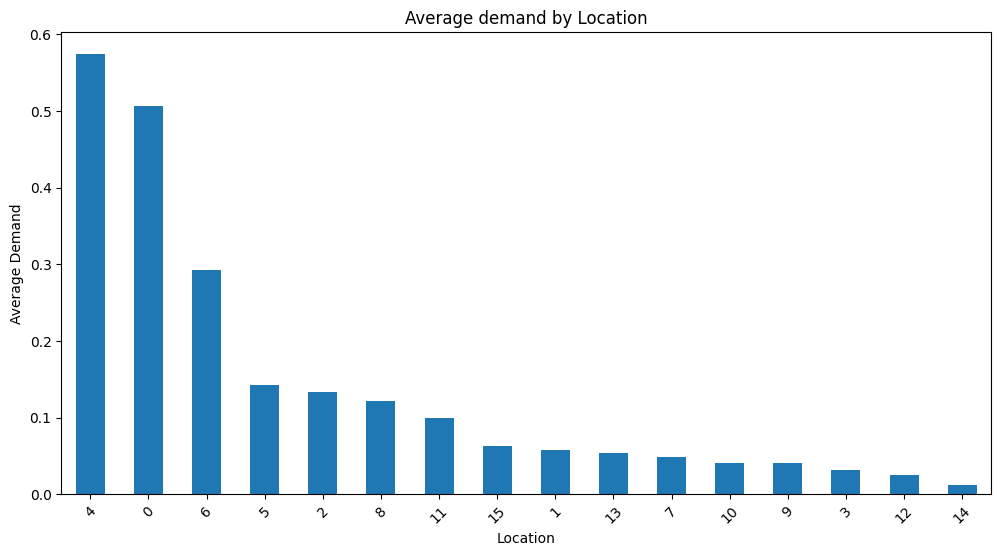

In [23]:
plt.figure(figsize=(12,6))
avg_demand_subba.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Average Demand')
plt.title('Average demand by Location')
plt.xticks(rotation = 45)

## Average Demand per Month

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '6'),
  Text(1, 0, '7'),
  Text(2, 0, '8'),
  Text(3, 0, '9'),
  Text(4, 0, '10'),
  Text(5, 0, '11'),
  Text(6, 0, '12')])

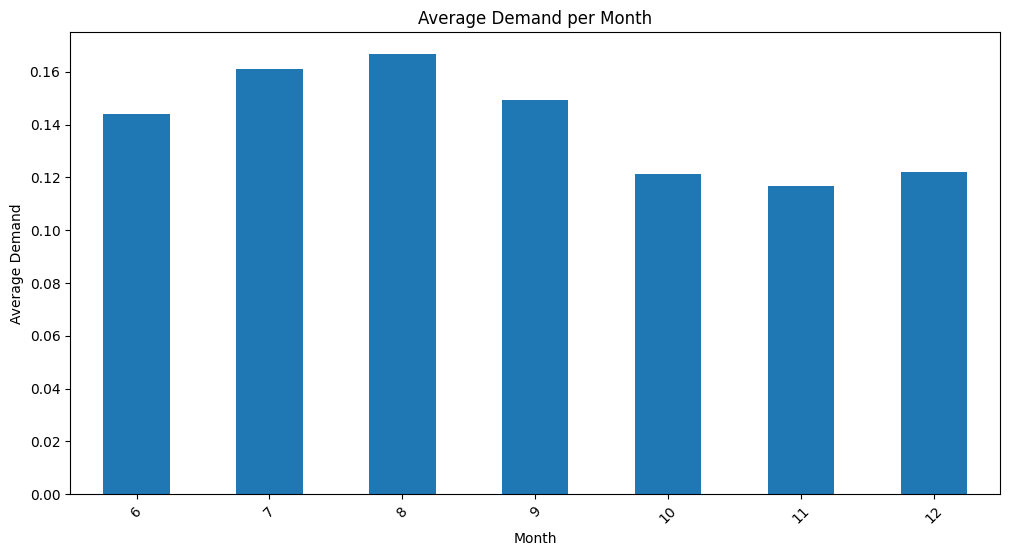

In [24]:
month_demand_group = df.groupby('month')
avg_demand_month = month_demand_group['value'].mean()

plt.figure(figsize = (12,6))
avg_demand_month.plot(kind = 'bar')
plt.xlabel('Month')
plt.ylabel('Average Demand')
plt.title('Average Demand per Month')
plt.xticks(rotation = 45)

## Correlation between Weather Factors and Demand Value

In [25]:
df.columns

Index(['datetime', 'tempF', 'windspeedMiles', 'weatherCode', 'precipMM',
       'precipInches', 'humidity', 'visibility', 'visibilityMiles', 'pressure',
       'pressureInches', 'cloudcover', 'HeatIndexC', 'HeatIndexF', 'DewPointC',
       'DewPointF', 'WindChillC', 'WindChillF', 'WindGustMiles',
       'WindGustKmph', 'FeelsLikeC', 'FeelsLikeF', 'uvIndex', 'subba-name',
       'value', 'value-units', 'zone', 'month'],
      dtype='object')

Text(0.5, 1.0, 'Correlation between Weather Factors and Demand Value')

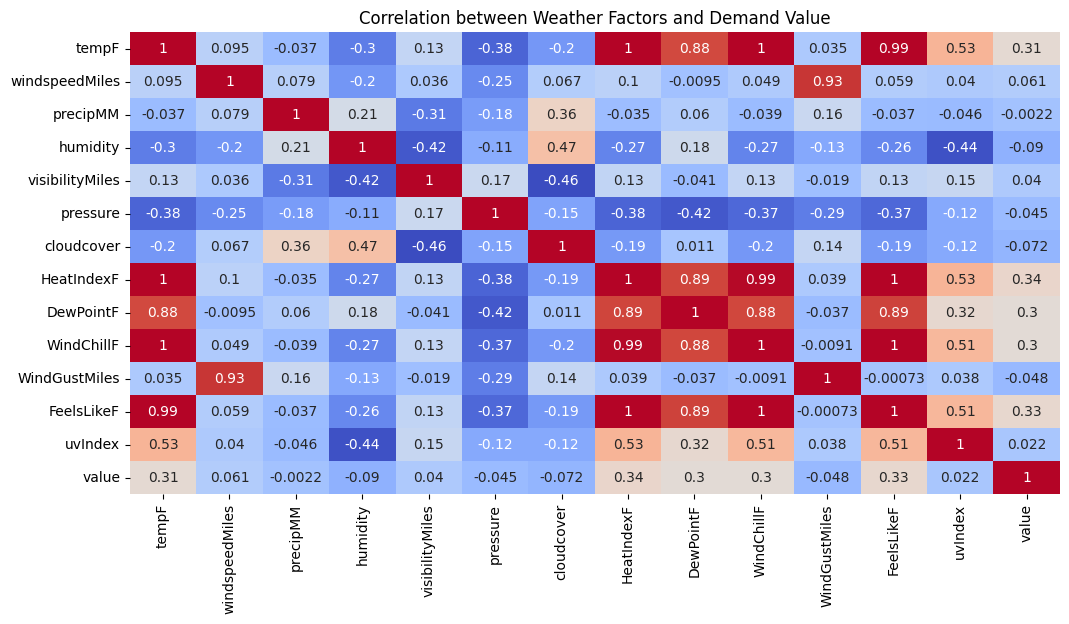

In [26]:
weather_factors_value = df[['tempF', 'windspeedMiles', 'precipMM', 'humidity', 'visibilityMiles', 'pressure', 'cloudcover', 'HeatIndexF', 'DewPointF', 'WindChillF', 'WindGustMiles', 'FeelsLikeF', 'uvIndex', 'value']]
weather_corr = weather_factors_value.corr()

plt.figure(figsize = (12,6))
sns.heatmap(weather_corr, annot = True, cmap = 'coolwarm', cbar=False)
plt.title('Correlation between Weather Factors and Demand Value')

In [27]:
# Step 1: Find pairs of features with correlation > 0.7
threshold = 0.7
high_corr_pairs = [(weather_corr.columns[i], weather_corr.columns[j], weather_corr.iloc[i, j])
                   for i in range(len(weather_corr.columns)) for j in range(i)
                   if abs(weather_corr.iloc[i, j]) > threshold]

# Step 2: Evaluate how each feature in the pair is correlated with 'value'
print("Highly correlated feature pairs and their correlation with 'value':")
for feature1, feature2, corr_value in high_corr_pairs:
    corr_feature1_value = weather_corr.loc[feature1, 'value']
    corr_feature2_value = weather_corr.loc[feature2, 'value']
    print(f"Pair: {feature1} and {feature2} - Correlation: {corr_value:.2f}")
    print(f"  {feature1} with 'value': {corr_feature1_value:.2f}")
    print(f"  {feature2} with 'value': {corr_feature2_value:.2f}")

    # Compare correlations with 'value' and suggest which to keep
    if abs(corr_feature1_value) > abs(corr_feature2_value):
        print(f"  => {feature1} is more correlated with 'value', consider keeping it.")
    else:
        print(f"  => {feature2} is more correlated with 'value', consider keeping it.")
    print('-' * 80)

Highly correlated feature pairs and their correlation with 'value':
Pair: HeatIndexF and tempF - Correlation: 1.00
  HeatIndexF with 'value': 0.34
  tempF with 'value': 0.31
  => HeatIndexF is more correlated with 'value', consider keeping it.
--------------------------------------------------------------------------------
Pair: DewPointF and tempF - Correlation: 0.88
  DewPointF with 'value': 0.30
  tempF with 'value': 0.31
  => tempF is more correlated with 'value', consider keeping it.
--------------------------------------------------------------------------------
Pair: DewPointF and HeatIndexF - Correlation: 0.89
  DewPointF with 'value': 0.30
  HeatIndexF with 'value': 0.34
  => HeatIndexF is more correlated with 'value', consider keeping it.
--------------------------------------------------------------------------------
Pair: WindChillF and tempF - Correlation: 1.00
  WindChillF with 'value': 0.30
  tempF with 'value': 0.31
  => tempF is more correlated with 'value', consider k

Looking at the plot - it can be decided to drop
1. 'DewPointF', 'WindChillF', 'HeatIndexF', 'FeelsLikeF' and 'tempF' - are highly correlated
2. 'windspeedMiles' and 'WindGustMiles' are also highly correlated with each other

Considering how they are correlated with the target variable ('Value') - we will drop few features

Should look into ERCO - Far West

## Variance Inflation Factor (VIF)

In [28]:
from statsmodels.stats. outliers_influence import variance_inflation_factor

features = weather_factors_value.drop(columns=['value'])
vif_data = pd.DataFrame()
vif_data['features'] = features.columns

vif_data['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

vif_data

,features,VIF
0,tempF,14139.982914
1,windspeedMiles,39.990017
2,precipMM,1.291686
3,humidity,69.307084
4,visibilityMiles,27.421375
5,pressure,37.101456
6,cloudcover,3.222166
7,HeatIndexF,10630.695788
8,DewPointF,395.536053
9,WindChillF,16597.440597


1. Very High VIF - tempF, HeatIndexF, WindChillF, FeelsLikeF
2. Moderate VIF - windspeedMiles, humidity, visibilityMiles,pressure, DewPointF, WindGustMiles
3. Low VIF - precipMM, cloudcover, uvindex


So the columns initially which can be considered are - 'datetime', 'tempF', 'windspeedMiles', 'precipMM', 'humidity', 'visibilityMiles', 'pressure', 'cloudcover', 'HeatIndexF', 'DewPointF', 'WindChillF', 'WindGustMiles', 'FeelsLikeF', 'uvIndex', 'subba-name','value', 'value-units', 'zone', 'Month' - Dropping selected columns as few features are captured in different units


The rest few columns to be dropped is yet to be decided based on other factors

In [29]:
df.head()

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone,month
0,2019-06-05 17:00:00,0.761468,0.387097,0.244186,0.017045,0.000000,0.793478,0.9,0.833333,0.484848,...,0.366667,0.357143,0.810811,0.813433,0.555556,0,0.524034,0,8,6
1,2019-06-05 17:00:00,0.788991,0.193548,0.000000,0.000000,0.000000,0.184783,1.0,1.000000,0.484848,...,0.133333,0.132653,0.770270,0.768657,0.666667,2,0.126344,0,10,6
2,2019-06-05 17:00:00,0.752294,0.354839,0.941860,0.329545,0.285714,0.619565,1.0,1.000000,0.500000,...,0.266667,0.275510,0.783784,0.776119,0.555556,4,0.574779,0,11,6
3,2019-06-05 17:00:00,0.779817,0.193548,0.011628,0.000000,0.000000,0.586957,1.0,1.000000,0.484848,...,0.200000,0.193878,0.797297,0.805970,0.666667,3,0.035761,0,12,6
4,2019-06-05 17:00:00,0.779817,0.129032,0.011628,0.000000,0.000000,0.652174,0.9,0.833333,0.484848,...,0.150000,0.153061,0.824324,0.820896,0.666667,6,0.298877,0,13,6


In [30]:
df['value-units'].value_counts()

value-units
0    80000
Name: count, dtype: int64

In [31]:
column_names = df.columns.tolist()
print(column_names)

['datetime', 'tempF', 'windspeedMiles', 'weatherCode', 'precipMM', 'precipInches', 'humidity', 'visibility', 'visibilityMiles', 'pressure', 'pressureInches', 'cloudcover', 'HeatIndexC', 'HeatIndexF', 'DewPointC', 'DewPointF', 'WindChillC', 'WindChillF', 'WindGustMiles', 'WindGustKmph', 'FeelsLikeC', 'FeelsLikeF', 'uvIndex', 'subba-name', 'value', 'value-units', 'zone', 'month']


In [32]:
selected_df = df[['HeatIndexF', 'tempF', 'WindChillF', 'windspeedMiles', 'FeelsLikeF',
                            'precipMM', 'humidity', 'visibilityMiles', 'pressure', 'cloudcover', 'uvIndex','subba-name','zone','month','value']]




In [33]:
selected_df.head()

,HeatIndexF,tempF,WindChillF,windspeedMiles,FeelsLikeF,precipMM,humidity,visibilityMiles,pressure,cloudcover,uvIndex,subba-name,zone,month,value
0,0.784483,0.761468,0.795276,0.387097,0.813433,0.017045,0.793478,0.833333,0.484848,0.87,0.555556,0,8,6,0.524034
1,0.732759,0.788991,0.818898,0.193548,0.768657,0.000000,0.184783,1.000000,0.484848,0.09,0.666667,2,10,6,0.126344
2,0.741379,0.752294,0.787402,0.354839,0.776119,0.329545,0.619565,1.000000,0.500000,0.63,0.555556,4,11,6,0.574779
3,0.775862,0.779817,0.811024,0.193548,0.805970,0.000000,0.586957,1.000000,0.484848,0.40,0.666667,3,12,6,0.035761
4,0.793103,0.779817,0.811024,0.129032,0.820896,0.000000,0.652174,0.833333,0.484848,0.32,0.666667,6,13,6,0.298877


In [34]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = selected_df.drop('value', axis=1)  # Features (drop the target column 'value')
y = selected_df['value']  # Target variable (the 'value' column)

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the splits
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)



Training set: (64000, 14) (64000,)
Test set: (16000, 14) (16000,)


# Model Building and Training

Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Fit the model on the training data
lin_reg.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = lin_reg.predict(X_test)

# Evaluate the model on the test set
print("Linear Regression Test Set Metrics:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("R-squared (R²):", r2_score(y_test, y_test_pred))


Linear Regression Test Set Metrics:
Mean Squared Error (MSE): 0.019362761949233608
Mean Absolute Error (MAE): 0.09609929067869967
R-squared (R²): 0.37046505034736854


Lasso Regression

In [36]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Lasso model with an alpha (regularization strength)
lasso_reg = Lasso(alpha=0.1)

# Fit the model on the training data
lasso_reg.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = lasso_reg.predict(X_test)

# Evaluate the model on the test set
print("Lasso Regression Test Set Metrics:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("R-squared (R²):", r2_score(y_test, y_test_pred))


Lasso Regression Test Set Metrics:
Mean Squared Error (MSE): 0.023733758833589597
Mean Absolute Error (MAE): 0.10451488877933321
R-squared (R²): 0.22835230265468864


SVR without PCA

In [37]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the LinearSVR model
linear_svr = LinearSVR(random_state=42, max_iter=10000)

# Fit the model on the training data
linear_svr.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = linear_svr.predict(X_test)

# Evaluate the model on the test set
print("LinearSVR Test Set Metrics:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("R-squared (R²):", r2_score(y_test, y_test_pred))


LinearSVR Test Set Metrics:
Mean Squared Error (MSE): 0.02365678347745881
Mean Absolute Error (MAE): 0.08894112496848768
R-squared (R²): 0.23085497645057285


/Users/amoghagadde/Desktop/Amogha/Northeastern/SEM_3/ML_Ops/Project/mlops-project/mlops_env/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVR with PCA

In [38]:
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize the LinearSVR model
linear_svr = LinearSVR(random_state=42, max_iter=20000)

# Fit the model on the training data
linear_svr.fit(X_train_pca, y_train)

# Make predictions on the test data
y_test_pred = linear_svr.predict(X_test_pca)

# Evaluate the model on the test set
print("LinearSVR Test Set Metrics (with PCA):")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("R-squared (R²):", r2_score(y_test, y_test_pred))


LinearSVR Test Set Metrics (with PCA):
Mean Squared Error (MSE): 0.027700371559176772
Mean Absolute Error (MAE): 0.09203232115494465
R-squared (R²): 0.09938716074770737


/Users/amoghagadde/Desktop/Amogha/Northeastern/SEM_3/ML_Ops/Project/mlops-project/mlops_env/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [39]:
print(f"Number of components retained:", pca.n_components_)

Number of components retained: 3


LSTM (Vanilla)

In [40]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [42]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (64000, 14)
X_test shape: (16000, 14)
y_train shape: (64000,)
y_test shape: (16000,)


In [43]:
X_train = X_train.to_numpy().reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.to_numpy().reshape((X_test.shape[0], 1, X_test.shape[1]))

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [44]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (64000, 1, 14)
X_test shape: (16000, 1, 14)
y_train shape: (64000,)
y_test shape: (16000,)


In [45]:
X_train.shape

(64000, 1, 14)

In [46]:
print(X_train.dtype)
print(X_test.dtype)

float64
float64


In [47]:
print(type(X_train))

<class 'numpy.ndarray'>


In [49]:
# Check for NaN or None values
print(np.isnan(X_train).sum())
print(np.isnan(X_test).sum())

In [51]:
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation = 'relu', input_shape = (1, X_train.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer = 'adam', loss = 'mse')

lstm_model.fit(X_train, y_train, epochs = 200, verbose = 1)

y_test_pred = lstm_model.predict(X_test)

# Evaluate the model on the test set
print("LSTM Model Test Set Metrics:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("R-squared (R²):", r2_score(y_test, y_test_pred))

Epoch 1/200


/Users/amoghagadde/Desktop/Amogha/Northeastern/SEM_3/ML_Ops/Project/mlops-project/mlops_env/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 371us/step - loss: 0.0262
Epoch 2/200
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 361us/step - loss: 0.0026
Epoch 3/200
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 367us/step - loss: 0.0020
Epoch 4/200
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 364us/step - loss: 0.0017
Epoch 5/200
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 363us/step - loss: 0.0016
Epoch 6/200
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 360us/step - loss: 0.0014
Epoch 7/200
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 362us/step - loss: 0.0013
Epoch 8/200
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 361us/step - loss: 0.0012
Epoch 9/200
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 359us/step - loss: 0.0012
Epoch 10/200
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 357us/step - loss: 0.0012
Epoch 11/200
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 356us/step - loss: 0.0012
Epoch 12/200
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 361us/step - loss: 0.0011
Epoch 13/200
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 360us/step - loss: 0.0011
Epoch 14/200
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 378us/step - loss: 0.0011

In [52]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (64000, 1, 14)
X_test shape: (16000, 1, 14)
y_train shape: (64000,)
y_test shape: (16000,)
